In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sklearn.datasets as dta
import scipy.stats as st
from scipy.stats import sem

In [4]:
# reading file content
df = pd.read_csv('./Resources/cleaned_df.csv')

### Cleaning Row Data

In [5]:
# The structure of the dataset
df.info()
# total 10 columns. All non-null, 307122 rows. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307122 entries, 0 to 307121
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   dateCrawled         307122 non-null  object
 1   name                307122 non-null  object
 2   price               307122 non-null  int64 
 3   vehicleType         307122 non-null  object
 4   yearOfRegistration  307122 non-null  int64 
 5   model               307122 non-null  object
 6   kilometer           307122 non-null  int64 
 7   fuelType            307122 non-null  object
 8   brand               307122 non-null  object
 9   lastSeen            307122 non-null  object
dtypes: int64(3), object(7)
memory usage: 23.4+ MB


In [6]:
df.describe()

# Interquartile distribution 

,price,yearOfRegistration,kilometer
count,3.071220e+05,307122.000000,307122.000000
mean,9.404320e+03,2002.903706,125391.180052
std,5.192426e+05,6.597030,39347.308065
min,0.000000e+00,1910.000000,5000.000000
25%,1.399000e+03,1999.000000,100000.000000
50%,3.450000e+03,2003.000000,150000.000000
75%,7.980000e+03,2007.000000,150000.000000
max,1.000000e+08,2018.000000,150000.000000


In [7]:
# Getting the dimensions
df.shape

(307122, 10)

In [8]:
# Renaming dateCrawled to offeringDate
df.rename(columns={'dateCrawled': 'offeringDate'}, inplace=True)
# Listing out the columns
df.columns

Index(['offeringDate', 'name', 'price', 'vehicleType', 'yearOfRegistration',
       'model', 'kilometer', 'fuelType', 'brand', 'lastSeen'],
      dtype='object')

In [9]:
df.head(10)

,offeringDate,name,price,vehicleType,yearOfRegistration,model,kilometer,fuelType,brand,lastSeen
0,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,grand,125000,diesel,jeep,2016-04-05 12:47:46
1,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,golf,150000,benzin,volkswagen,2016-03-17 17:40:17
2,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,fabia,90000,diesel,skoda,2016-04-06 10:17:21
3,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,3er,150000,benzin,bmw,2016-04-06 19:17:07
4,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,2_reihe,150000,benzin,peugeot,2016-04-05 18:18:39
5,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,andere,40000,benzin,volkswagen,2016-03-25 16:47:58
6,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,14500,bus,2014,c_max,30000,benzin,ford,2016-04-04 23:42:13
7,2016-03-26 19:54:18,Mazda_3_1.6_Sport,2000,limousine,2004,3_reihe,150000,benzin,mazda,2016-04-06 10:45:34
8,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,2799,kombi,2005,passat,150000,diesel,volkswagen,2016-04-07 10:25:17
9,2016-03-15 22:49:09,"VW_Passat_Facelift_35i__""7Sitzer""",999,kombi,1995,passat,150000,benzin,volkswagen,2016-04-01 13:16:16


###### Some entries for vehicleType are in German, converting them to English. 

In [10]:
df['vehicleType'] = df['vehicleType'].replace({'andere' : 'other','kombi' : 'station','kleinwagen': 'sedan',
                                               'cabrio': 'convertable','limousine': 'luxury'})
df.vehicleType.unique()


array(['suv', 'sedan', 'luxury', 'convertable', 'bus', 'station', 'coupe',
       'other'], dtype=object)

In [11]:
# Getting rid of Duplicates
 
duplicate_rows = df[df.duplicated()]

duplicate_rows 

,offeringDate,name,price,vehicleType,yearOfRegistration,model,kilometer,fuelType,brand,lastSeen
129403,2016-03-07 12:00:46,Golf_7_Variant__184_PS__Erstzulassung_2013__53...,10000,station,2013,golf,60000,diesel,volkswagen,2016-03-20 12:49:27
148340,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,1799,coupe,1999,clk,20000,benzin,mercedes_benz,2016-03-09 09:46:57
200383,2016-03-28 00:56:10,Suzuki_Ignis,1000,sedan,2002,andere,150000,benzin,suzuki,2016-03-28 08:46:21
223758,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,4699,coupe,2003,clk,125000,benzin,mercedes_benz,2016-04-07 09:44:54
282289,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,1999,station,2001,passat,150000,diesel,volkswagen,2016-03-18 18:46:15


In [12]:
# No more duplicates
df = df.drop_duplicates() 


----------------------------

# Research Questions to Answer

____________________________________________________

##  Prices Distribution 
##### Finding outliers those could deviate mean and median prices

In [13]:
df['price'].max()

99999999

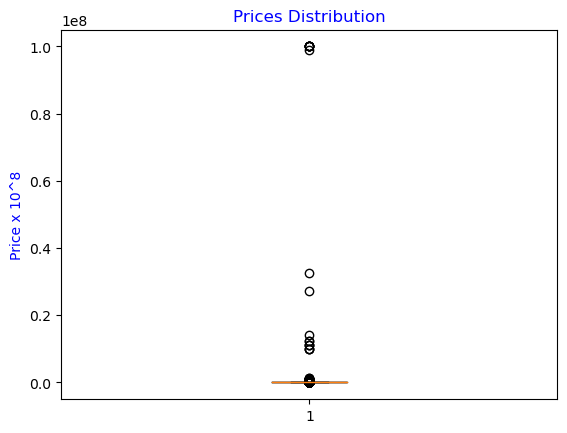

In [14]:
fig1, ax1 = plt.subplots()
ax1.set_title('Prices Distribution',color='b')
ax1.set_ylabel('Price x 10^8',color='b')
ax1.boxplot(df['price'])
plt.show()

In [15]:
df2 = df.loc[(df['price'] < 100*1000)&(df['price']>300),:]
df2.shape

(293131, 10)

In [16]:
df2['price'].min()

301

In [17]:
df2.head()

,offeringDate,name,price,vehicleType,yearOfRegistration,model,kilometer,fuelType,brand,lastSeen
0,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,grand,125000,diesel,jeep,2016-04-05 12:47:46
1,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,sedan,2001,golf,150000,benzin,volkswagen,2016-03-17 17:40:17
2,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,sedan,2008,fabia,90000,diesel,skoda,2016-04-06 10:17:21
3,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,luxury,1995,3er,150000,benzin,bmw,2016-04-06 19:17:07
4,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,2200,convertable,2004,2_reihe,150000,benzin,peugeot,2016-04-05 18:18:39


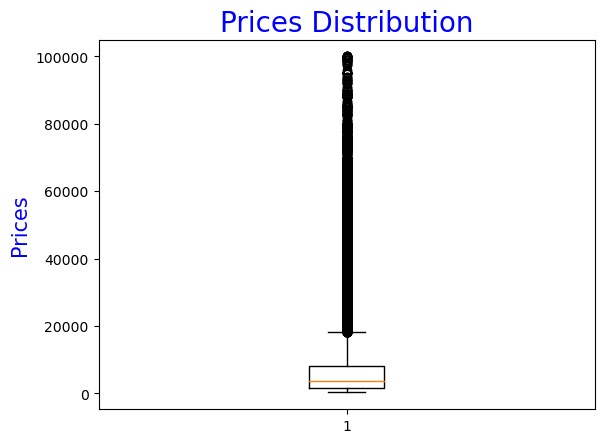

In [18]:
fig1, ax1 = plt.subplots()
ax1.set_title('Prices Distribution',fontsize= 20,color='b')
ax1.set_ylabel('Prices',fontsize= 15,color='b')
ax1.boxplot(df2['price'])
plt.savefig("./image/Price Distribution (box plot).png")
plt.show()

In [19]:
quartiles = df2['price'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of prices is: {lowerq}")
print(f"The upper quartile of prices is: {upperq}")
print(f"")
print(f"The interquartile range of prices is: {iqr}")
print(f"")
print(f"The the min of prices is: {df2['price'].min()}")
print(f"The the max of prices is: {df2['price'].max()}")
print(f"The the mean of prices is: {df2['price'].mean()}")
print(f"The the median of prices is: {quartiles[0.5]} ")
print(f"The the mode of prices is: {df2['price'].mode()}")
print(f"")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of prices is: 1550.0
The upper quartile of prices is: 8250.0

The interquartile range of prices is: 6700.0

The the min of prices is: 301
The the max of prices is: 99999
The the mean of prices is: 6385.723505872801
The the median of prices is: 3650.0 
The the mode of prices is: 0    1500
Name: price, dtype: int64

Values below -8500.0 could be outliers.
Values above 18300.0 could be outliers.


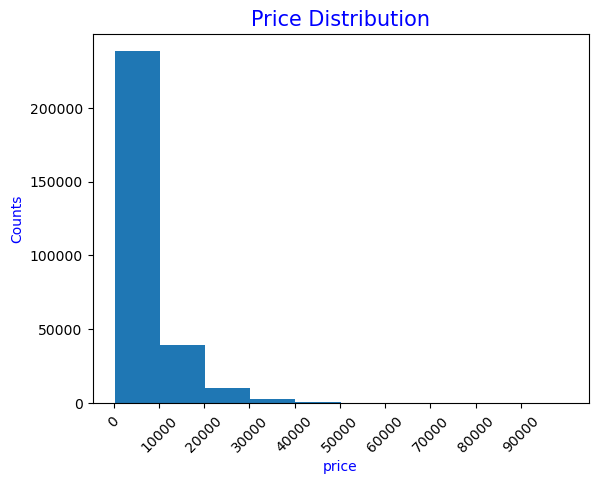

NormaltestResult(statistic=3400.5152350464928, pvalue=0.0)
NormaltestResult(statistic=72452.05769688683, pvalue=0.0)


In [20]:
# Determine if the auto prices are normally distributed using a small and large sample size. 
plt.hist(df2['price'])
plt.title('Price Distribution',fontsize=15,color='b')
plt.xlabel('price',color='b')
plt.ylabel('Counts',color='b')
plt.xticks(np.arange(0,100000,10000),rotation=45)
plt.savefig("./image/Price Distribution (hist plot).png")
plt.show()
print(st.normaltest(df2['price'].sample(5000)))
print(st.normaltest(df2['price'].sample(100000)))

In [21]:
# so pvalue is below 0.05 therefore its not normal 

## Using price range, what is the median selling price for each car type?
###      -   Creating Bins
###      -   Number of Sales to Price

In [22]:
# converting df2 into dataframe to avoid error in next step
df2 = pd.DataFrame(df2)

In [23]:
# Bins
bins = [0, 1500, 3000, 4500, 6000, 7500, float('inf')]
labels = ['<1500', '1500-3000', '3000-4500', '4500-6000', '6000-7500', '7500+']

# Assign range as per bins on price column. 
# Group by vehicleType & priceRange. Number of sales, typical selling price/each group. 
df2['priceRange'] = pd.cut(df2['price'], bins=bins, labels=labels) # range stored in priceRange.
df2['priceRange']

0             7500+
1             <1500
2         3000-4500
3             <1500
4         1500-3000
            ...    
307117        <1500
307118        <1500
307119        7500+
307120    3000-4500
307121        7500+
Name: priceRange, Length: 293131, dtype: category
Categories (6, object): ['<1500' < '1500-3000' < '3000-4500' < '4500-6000' < '6000-7500' < '7500+']

In [24]:
# grouping by price range
category_df = df2.groupby(['vehicleType', 'priceRange']).agg({'price': ['count', 'median']}).reset_index()
#renaming for clarity
category_df.columns =  ['vehicleType', 'priceRange', 'salesCount', 'medianPrice']

category_df.head(100)

,vehicleType,priceRange,salesCount,medianPrice
0,bus,<1500,3833,1000.0
1,bus,1500-3000,5434,2350.0
2,bus,3000-4500,4334,3800.0
3,bus,4500-6000,3461,5300.0
4,bus,6000-7500,2363,6899.0
5,bus,7500+,8384,12150.0
6,convertable,<1500,1686,1000.0
7,convertable,1500-3000,3046,2400.0
8,convertable,3000-4500,2766,3800.0
9,convertable,4500-6000,2179,5400.0


---------------------------------

## Visualizing Median Price and Sales Count to Price

In [25]:
x_axis = category_df['vehicleType']
x_axis

0             bus
1             bus
2             bus
3             bus
4             bus
5             bus
6     convertable
7     convertable
8     convertable
9     convertable
10    convertable
11    convertable
12          coupe
13          coupe
14          coupe
15          coupe
16          coupe
17          coupe
18         luxury
19         luxury
20         luxury
21         luxury
22         luxury
23         luxury
24          other
25          other
26          other
27          other
28          other
29          other
30          sedan
31          sedan
32          sedan
33          sedan
34          sedan
35          sedan
36        station
37        station
38        station
39        station
40        station
41        station
42            suv
43            suv
44            suv
45            suv
46            suv
47            suv
Name: vehicleType, dtype: object

In [26]:
y_axis = category_df['salesCount']
y_axis

0      3833
1      5434
2      4334
3      3461
4      2363
5      8384
6      1686
7      3046
8      2766
9      2179
10     1730
11     9242
12     2712
13     2618
14     1705
15     1307
16      881
17     7025
18    20728
19    18115
20    10241
21     7246
22     5777
23    23755
24      724
25      555
26      339
27      212
28      121
29      409
30    28815
31    15453
32     8040
33     5186
34     3252
35     5868
36    13863
37    12358
38     7367
39     5317
40     4187
41    17190
42      505
43     1005
44     1073
45     1076
46      917
47     8731
Name: salesCount, dtype: int64

In [27]:
labels2 = [1500,3000,4500,6000,7500,100000]
color_range = list(labels2)
color_range

[1500, 3000, 4500, 6000, 7500, 100000]

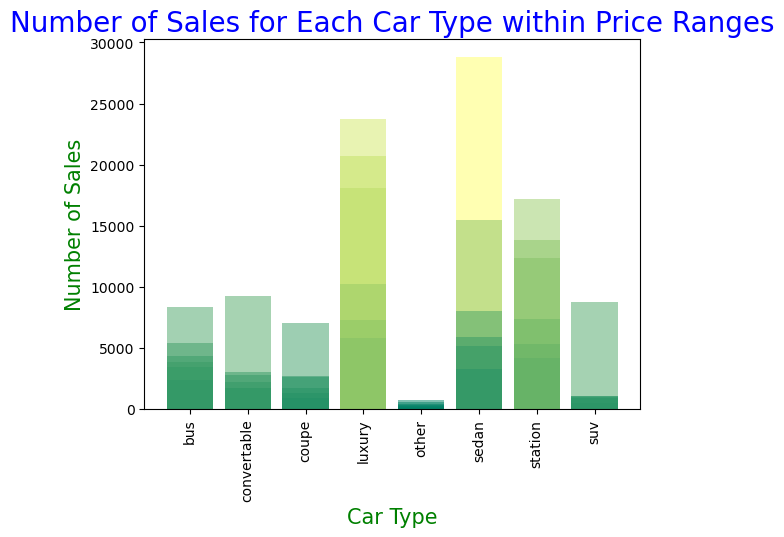

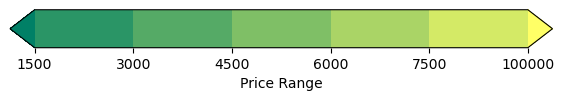

In [28]:
# Bar plot for sales to price 

fig = plt.figure()
my_cmap = plt.colormaps.get_cmap('summer')
rescale = lambda y: (y_axis - min(y_axis)) / (max(y_axis) - min(y_axis))
plt.bar(x_axis, y_axis, color=my_cmap(rescale(y_axis)), alpha = .5)
plt.title('Number of Sales for Each Car Type within Price Ranges',fontsize=20,color='b')
plt.xlabel('Car Type',fontsize=15,color='g')
plt.ylabel('Number of Sales',fontsize=15,color='g')
plt.xticks(rotation = "vertical")

fig, ax = plt.subplots(figsize=(7, 1))
fig.subplots_adjust(bottom=0.5)

cmap = plt.cm.summer
bounds = color_range
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Price Range")

plt.savefig("./image/Number of Sales for Each Car Type within Price Ranges.png")
plt.show()


In [29]:
df2 = pd.DataFrame(df2)
df2['price'].head()

0    9800
1    1500
2    3600
3     650
4    2200
Name: price, dtype: int64

In [30]:
sales_count_price = df2.groupby('price').count()
sales_count_price

,offeringDate,name,vehicleType,yearOfRegistration,model,kilometer,fuelType,brand,lastSeen,priceRange
price,,,,,,,,,,
301,4,4,4,4,4,4,4,4,4,4
305,1,1,1,1,1,1,1,1,1,1
308,1,1,1,1,1,1,1,1,1,1
309,2,2,2,2,2,2,2,2,2,2
310,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...
99500,2,2,2,2,2,2,2,2,2,2
99900,3,3,3,3,3,3,3,3,3,3
99911,1,1,1,1,1,1,1,1,1,1


In [31]:
sales_count_price.dtypes

offeringDate          int64
name                  int64
vehicleType           int64
yearOfRegistration    int64
model                 int64
kilometer             int64
fuelType              int64
brand                 int64
lastSeen              int64
priceRange            int64
dtype: object

In [32]:
sales_count_price.index

Int64Index([  301,   305,   308,   309,   310,   315,   316,   319,   320,
              321,
            ...
            95964, 97500, 98000, 98500, 99000, 99500, 99900, 99911, 99990,
            99999],
           dtype='int64', name='price', length=5026)

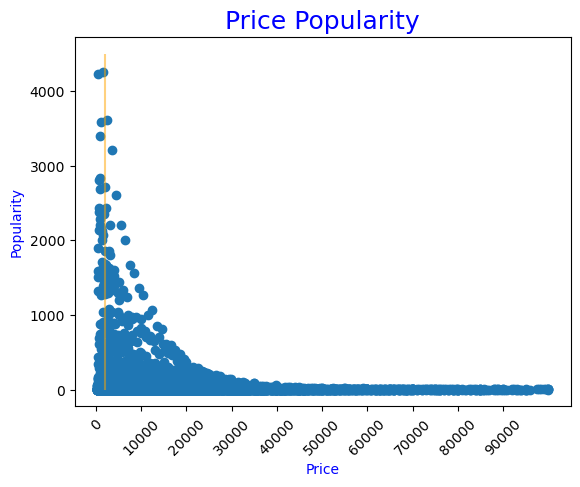

In [33]:
plt.scatter(sales_count_price.index, sales_count_price['lastSeen'])

plt.xticks(np.arange(0,100000,10000),rotation=45)
plt.vlines(2000,0,4500,alpha=0.5,color='orange')
#needs xlim to be setup *************
plt.title('Price Popularity',color='b',fontsize=18)
plt.xlabel("Price",color='b')
plt.ylabel("Popularity",color='b')

plt.savefig("./image/Price Popularity (scatter plot).png")
plt.show()


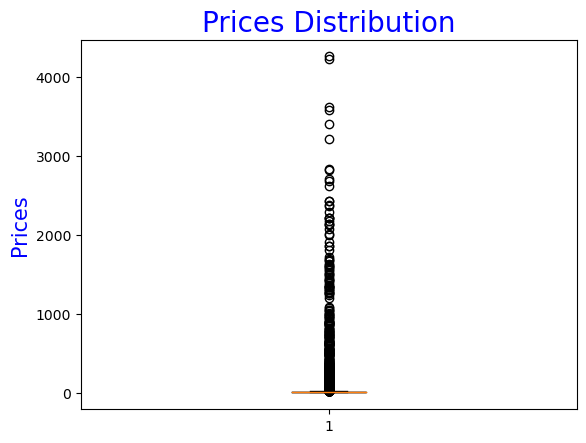

In [34]:
fig1, ax2 = plt.subplots()
ax2.set_title('Prices Distribution',fontsize= 20,color='b')
ax2.set_ylabel('Prices',fontsize= 15,color='b') 
ax2.boxplot(sales_count_price['lastSeen'])
plt.savefig("./image/Price Distribution (box plot).png")
plt.show()

   ------------------------------

## - What is the least and most popular car type being sold?
## - Using date of registration, which model year is most purchased.

In [35]:
# Storing "group by vehicleType" and its count for each vehicleType in vehTypeCount
veh_Type_Count = df2['vehicleType'].value_counts() # vehicleType: the index & counts: the values
veh_Type_Count

luxury         85862
sedan          66614
station        60282
bus            27809
convertable    20649
coupe          16248
suv            13307
other           2360
Name: vehicleType, dtype: int64

In [36]:
veh_Type_Count.dtypes

dtype('int64')

In [37]:
# Most & least popular vehicle
most_popular = veh_Type_Count.idxmax()
most_popular

'luxury'

In [38]:
least_popular = veh_Type_Count.idxmin()
least_popular

'other'

In [39]:
# Model year most purchased based on the date of registration
# convert to numeric
df2['yearOfRegistration'] = pd.to_numeric(df2['yearOfRegistration'], errors='coerce')

# Group by year and count 
year_counts = df2['yearOfRegistration'].value_counts() 
year_counts

2006    18716
1999    18655
2005    18409
2004    18312
2003    18243
        ...  
1910        2
1935        1
1928        1
1948        1
1939        1
Name: yearOfRegistration, Length: 91, dtype: int64

In [40]:
most_purchased_model = year_counts.idxmax()

print("Least popular car type: ", least_popular)
print("Most popular car type: ", most_popular)
print("Most purchased model year: ", most_purchased_model)

Least popular car type:  other
Most popular car type:  luxury
Most purchased model year:  2006


#### Linregress Year of Registration to price

In [45]:
df2.head()

,offeringDate,name,price,vehicleType,yearOfRegistration,model,kilometer,fuelType,brand,lastSeen,priceRange
0,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,grand,125000,diesel,jeep,2016-04-05 12:47:46,7500+
1,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,sedan,2001,golf,150000,benzin,volkswagen,2016-03-17 17:40:17,<1500
2,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,sedan,2008,fabia,90000,diesel,skoda,2016-04-06 10:17:21,3000-4500
3,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,luxury,1995,3er,150000,benzin,bmw,2016-04-06 19:17:07,<1500
4,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,2200,convertable,2004,2_reihe,150000,benzin,peugeot,2016-04-05 18:18:39,1500-3000


In [41]:
x = year_reg_grouped = df2.groupby(['yearOfRegistration'])['price']
year_reg_grouped.head()

0          9800
1          1500
2          3600
3           650
4          2200
          ...  
280889     8750
282787    18250
290854     9000
291326    20000
299894    18900
Name: price, Length: 397, dtype: int64

In [42]:
y = year_reg_count = df2.groupby('yearOfRegistration').count()
year_reg_count

,offeringDate,name,price,vehicleType,model,kilometer,fuelType,brand,lastSeen,priceRange
yearOfRegistration,,,,,,,,,,
1910,2,2,2,2,2,2,2,2,2,2
1923,2,2,2,2,2,2,2,2,2,2
1927,2,2,2,2,2,2,2,2,2,2
1928,1,1,1,1,1,1,1,1,1,1
1929,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...
2014,4542,4542,4542,4542,4542,4542,4542,4542,4542,4542
2015,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603
2016,306,306,306,306,306,306,306,306,306,306


In [43]:
year = df2.loc[df2["yearOfRegistration"]==2006,"price"]
year

29        12500
40         3000
45         7000
53         6600
56         5000
          ...  
307051     3300
307065     9900
307072     3000
307085     4499
307104     5900
Name: price, Length: 18716, dtype: int64

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (91, 2) + inhomogeneous part.

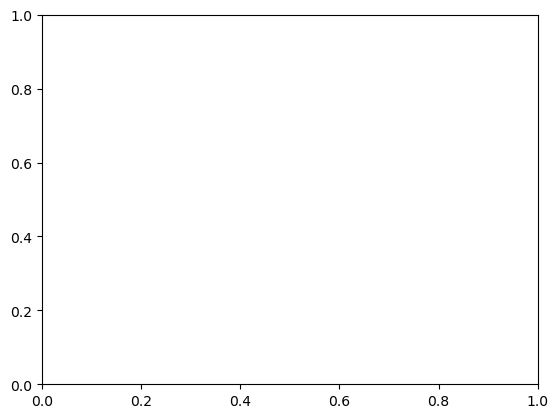

In [44]:
plt.scatter(year_reg_grouped,year_reg_count)

plt.plot(year,pe_fit,"--")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Petrol Electric Cars')
plt.show()

In [ ]:
# Plot the linear model on top of scatter plot 
year = df2.loc[(df2["yearOfRegistration"]==2006),"price"]
petrol_electric_cars = vehicle_data.loc[(vehicle_data["type"]=="Cars") & (vehicle_data["engine"]=="Petrol-Electric"),"number"]

plt.scatter(year_reg_grouped,year_reg_count)

plt.plot(year,pe_fit,"--")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Petrol Electric Cars')
plt.show()

-------------------

## T test for Registration year per Price

In [ ]:
df3 = pd.DataFrame(df2[['yearOfRegistration','price']])
df3

In [ ]:
# Calculate the population mean for Registration year 1999 and 2005 per Price
population1 = df3[df3["yearOfRegistration"] == 1999]
population1.price.mean()

In [ ]:
population2 = df3[df3["yearOfRegistration"] == 2006]
population2.price.mean()

In [ ]:
# Calculate Independent (Two Sample) t-test
st.ttest_ind(population1.price, population2.price, equal_var=False)

##### According to pvalue so these 2 samples are normal not different and alternative hypothesis

In [ ]:
# Some data to test with
def gendata(loc1=0, loc2=0):
    
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 20, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 20, density=True, alpha=0.7, label="population2")
    
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

### Independent T-Tests

Independent t-tests will compare the means of 2 independent populations.

#### Assumptions

1. Data is normally distributed
2. Data is independent
3. Data is homogenous (The standard deviations are roughly equal)

In [ ]:
# Generate some data and show the scatter plot
population1, population2 = gendata()

In [ ]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(population1, population2, equal_var=False)

In [ ]:
# Generate data with a bigger difference in means
population1, population2 = gendata(loc1=0, loc2=1)

In [ ]:
# Run the t-test on the two population samples. 
st.ttest_ind(population1, population2, equal_var=False)

-------------------------------

## Visualizing Vehicle Type Count

In [ ]:
# Using bar plot 
veh_Type_Count.sort_values(ascending=True).plot.bar()
plt.xlabel('Vehicle Type',color='b')
plt.ylabel('Count',color='b')
plt.title('Count of Each Vehicle Type',fontsize=15,color='b')
plt.savefig("./image/Count of Each Vehicle Type.png")
plt.show()

-----------------------------------------------------------

##  How long does a car stay on the market? 
   #### - Type of car 

*offeringDate and lastSeen are the columns to be used to determine marketDuration*

In [ ]:
# Convert columns to datetime
df2['offeringDate'] = pd.to_datetime(df2['offeringDate'])
df2['lastSeen'] = pd.to_datetime(df2['lastSeen'])

# Calculating duration
df2['marketDuration'] = df2['lastSeen'] - df2['offeringDate']

# Average duration group by car
mkt_Duration_By_Type_mean = df2.groupby('vehicleType')['marketDuration'].mean()

print(f"Car types stay on market on average {mkt_Duration_By_Type_mean.sort_values()}")

In [ ]:
# Plotting a pie chart
plt.figure(figsize=(5,5))
plt.pie(mkt_Duration_By_Type_mean, labels=mkt_Duration_By_Type_mean.index, autopct='%1.1f%%')
plt.title('Market Duration Distribution by Car Type',color='b')
plt.tight_layout()
plt.savefig("./image/Market Duration Distribution by Car Type.png")
plt.show()
# there is almost similar distribution of market duration for different vehicle types. 

-------------------------------------------------

## How much does mileage affect the car price?

In [ ]:
# group by kilometer and price. 
kilometer_grouped_df = df2.groupby('kilometer')['price'].mean()

# Mileage vs Average Price Visualized in Line Chart
plt.plot(kilometer_grouped_df,linewidth=1, marker='+',color='g')
plt.title('mileage affect the car price',fontsize=18,color='b')
plt.xlabel('Mileage (km)',fontsize=12,color='b')
plt.ylabel('Average Price (USD)',fontsize=12,color='b')
plt.vlines(10000,0,22000,alpha=0.5,color='orange',linestyle=':')
plt.grid()
plt.savefig("./image/mileage affect the car price.png")
plt.show()

----------------

## Number of sales vs mileage

In [ ]:
mileage_Sales_Count = df2.groupby(['kilometer'])['price'].count()
mileage_Sales_Count

In [ ]:
x = mileage_Sales_Count.keys()
x

In [ ]:
y = mileage_Sales_Count.values
y

In [ ]:
# Create a count plot to visualize the number of sales based on mileage
plt.scatter(x, y)

plt.xlabel('Mileage (in kilometers)',fontsize=15,color='b')
plt.ylabel('Number of Sales',fontsize=15,color='b')
plt.title('Mileage vs. Number of Sales',fontsize=20,color='b')

plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.savefig("./image/Mileage vs. Number of Sales.png")
plt.show()